In [1]:
from google.colab import files
uploaded = files.upload()

Saving gas_turbines.csv to gas_turbines.csv


#Import the Data

In [2]:
import pandas as pd
df=pd.read_csv('gas_turbines.csv')
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


#EDA

In [3]:
X = df.drop(df.columns[7],axis = 1)


,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


#Seperating the X and Y

In [18]:
X

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [4]:
Y = df['TEY']

#Model Fitting

In [29]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(Dense(12, input_dim=10,  activation='relu')) #input layer
model.add(Dense(1, activation='linear'))#output layer



#Metrics

In [30]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])


In [31]:
history = model.fit(X, Y, validation_split=0.33, epochs=100, batch_size=10)

Epoch 1/100
1008/1008 [==============================] - 2s 2ms/step - loss: 793.9000 - mean_squared_error: 793.9000 - val_loss: 111.0017 - val_mean_squared_error: 111.0017
Epoch 2/100
1008/1008 [==============================] - 2s 2ms/step - loss: 100.1280 - mean_squared_error: 100.1280 - val_loss: 66.1288 - val_mean_squared_error: 66.1288
Epoch 3/100
1008/1008 [==============================] - 2s 2ms/step - loss: 54.5204 - mean_squared_error: 54.5204 - val_loss: 39.3269 - val_mean_squared_error: 39.3269
Epoch 4/100
1008/1008 [==============================] - 2s 2ms/step - loss: 28.8123 - mean_squared_error: 28.8123 - val_loss: 20.4685 - val_mean_squared_error: 20.4685
Epoch 5/100
1008/1008 [==============================] - 2s 2ms/step - loss: 15.9772 - mean_squared_error: 15.9772 - val_loss: 11.8482 - val_mean_squared_error: 11.8482
Epoch 6/100
1008/1008 [==============================] - 2s 2ms/step - loss: 9.8231 - mean_squared_error: 9.8231 - val_loss: 7.1628 - val_mean_square

# Model Loss Plot

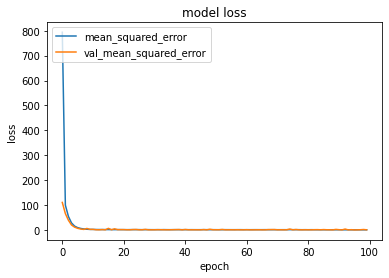

In [32]:
# summarize history for mean_square_error
import matplotlib.pyplot as plt
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['mean_squared_error', 'val_mean_squared_error'], loc='upper left')
plt.show()